In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MachineLearning-Data.xlsx"
data = pd.read_excel(filepath)

#drop one of the useless column.
data =  data.drop(columns=['DA concentration'])

#split the data into features and target
X = data.drop(columns=['DA Concentration (uM)','AA Concentration (uM)'])
y = data[['DA Concentration (uM)', 'AA Concentration (uM)']]

X.head()

,Peak Current (uA),Peak Potential (mV),Peak Area (uC)
0,8.763,133.447,40.418
1,9.755,147.679,44.194
2,14.559,172.276,70.734
3,21.614,174.853,112.173
4,31.215,164.517,168.123


In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
#initialize the KNN regressor and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

#predict the target variable
y_pred = knn_model.predict(X_test_scaled)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#display the evaluation metrics
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Mean Squared Error:  12216.5
R2 Score:  0.6481414671219876


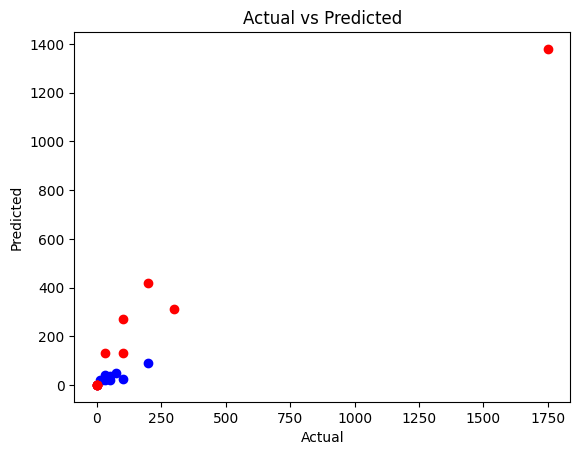

In [5]:
#plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.scatter(y_test['DA Concentration (uM)'], y_pred[:,0], color='blue')
plt.scatter(y_test['AA Concentration (uM)'], y_pred[:,1], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
#crete a dataframe of the actual and predicted values
df = pd.DataFrame({'Actual DA': y_test['DA Concentration (uM)'], 'Predicted DA': y_pred[:,0], 'Actual AA': y_test['AA Concentration (uM)'], 'Predicted AA': y_pred[:,1]})
df.head()

    Actual DA  Predicted DA  Actual AA  Predicted AA
13          0           0.0       1750        1380.0
39        200          92.0        200         420.0
30         75          50.0          0           0.0
45         30          22.0         30         130.0
17         10          22.0          0           0.0


In [7]:
#save the model
import joblib
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved successfully")

Model saved successfully


In [9]:
#interactive plot for the predicted vs actual values

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('DA Concentration Prediction', 'AA Concentration Prediction')
)


# DA Concentration Plot
fig.add_trace(
    go.Scatter(
        x=y_test['DA Concentration (uM)'],
        y=y_pred[:, 0],
        mode='markers',
        name='DA Predictions',
        marker=dict(color='blue', opacity=0.6),
        hovertemplate='Actual: %{x:.2f}<br>Predicted: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Perfect prediction line for DA
fig.add_trace(
    go.Scatter(
        x=[y_test['DA Concentration (uM)'].min(), y_test['DA Concentration (uM)'].max()],
        y=[y_test['DA Concentration (uM)'].min(), y_test['DA Concentration (uM)'].max()],
        mode='lines',
        name='Perfect Prediction (DA)',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=1
)

# AA Concentration Plot
fig.add_trace(
    go.Scatter(
        x=y_test['AA Concentration (uM)'],
        y=y_pred[:, 1],
        mode='markers',
        name='AA Predictions',
        marker=dict(color='green', opacity=0.6),
        hovertemplate='Actual: %{x:.2f}<br>Predicted: %{y:.2f}<extra></extra>'
    ),
    row=1, col=2
)

# Perfect prediction line for AA
fig.add_trace(
    go.Scatter(
        x=[y_test['AA Concentration (uM)'].min(), y_test['AA Concentration (uM)'].max()],
        y=[y_test['AA Concentration (uM)'].min(), y_test['AA Concentration (uM)'].max()],
        mode='lines',
        name='Perfect Prediction (AA)',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='KNN Model: Actual vs Predicted Concentrations',
    width=1200,
    height=600,
    showlegend=True,
    hovermode='closest'
)

# Update axes labels and annotations
fig.update_xaxes(title_text='Actual DA Concentration (µM)', row=1, col=1)
fig.update_yaxes(title_text='Predicted DA Concentration (µM)', row=1, col=1)
fig.update_xaxes(title_text='Actual AA Concentration (µM)', row=1, col=2)
fig.update_yaxes(title_text='Predicted AA Concentration (µM)', row=1, col=2)


# Show the plot
fig.show()